# WITH ELEVATED

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define number of samples
n_samples = 800
# Define category distribution
categories = np.random.choice(
    ["Healthy", "Periodontitis", "Elevated"],
    size=n_samples,
    p=[0.4, 0.4, 0.2]
)

# Define biomarker distributions
def log_normal_dist(mean, std, size):
    return np.random.lognormal(mean=np.log(mean), sigma=std, size=size)

def normal_dist(mean, std, size):
    return np.random.normal(mean, std, size)

def beta_dist(a, b, size):
    return np.random.beta(a, b, size)  # For pH

def uniform_dist(mean, std, size):
  return np.random.uniform(mean, std, size)

# Generate biomarker values based on category
data = {
    "Category": categories,
    "P. gingivalis": np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3]),  # Binary
    "F. nucleatum": np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4]),  # Binary
    "IL-1β": np.where(categories == "Healthy", uniform_dist(200, 0.3, n_samples),
                       np.where(categories == "Elevated", uniform_dist(450, 0.5, n_samples), uniform_dist(600, 0.4, n_samples))),

    "IL-6": np.where(categories == "Healthy", uniform_dist(5, 0.3, n_samples),
                      np.where(categories == "Elevated", uniform_dist(13, 0.5, n_samples), uniform_dist(19, 0.4, n_samples))),

    "IL-10": np.where(categories == "Healthy", log_normal_dist(5, 0.3, n_samples),
                       np.where(categories == "Elevated", log_normal_dist(9, 0.5, n_samples), log_normal_dist(12, 0.4, n_samples))),

    "MMP-8": np.where(categories == "Healthy", uniform_dist(120, 0.3, n_samples),
                       np.where(categories == "Elevated", uniform_dist(180, 0.3, n_samples), uniform_dist(250, 0.4, n_samples))),

    "Urea": np.where(categories == "Healthy", log_normal_dist(3.5, 0.3, n_samples),
                      np.where(categories == "Elevated", log_normal_dist(5.5, 0.5, n_samples), log_normal_dist(7, 0.4, n_samples))),

    "Uric Acid": np.where(categories == "Healthy", log_normal_dist(4, 0.3, n_samples),
                           np.where(categories == "Elevated", log_normal_dist(5, 0.3, n_samples), log_normal_dist(3, 0.4, n_samples))),

    "Glutathione": np.where(categories == "Healthy", uniform_dist(2.5, 0.3, n_samples),
                             np.where(categories == "Elevated", uniform_dist(3, 0.5, n_samples), uniform_dist(4, 0.4, n_samples))),

    "Nitric Oxide": np.where(categories == "Healthy", log_normal_dist(80, 0.3, n_samples),
                              np.where(categories == "Elevated", log_normal_dist(120, 0.5, n_samples), log_normal_dist(160, 0.4, n_samples))),

    "Vitamin C": np.where(categories == "Healthy", log_normal_dist(30, 0.3, n_samples),
                           np.where(categories == "Elevated", log_normal_dist(25, 0.5, n_samples), log_normal_dist(15, 0.4, n_samples))),

    "Sodium (Na+)": normal_dist(140, 5, n_samples),

    "Potassium (K+)": normal_dist(4.2, 1, n_samples),

    "pH": beta_dist(2, 5, n_samples) * (7.2 - 5.8) + 5.8,  # Scale Beta distribution to pH range

    "Smoking": np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15]),

    "Gender": np.random.choice(["M", "F"], size=n_samples, p=[0.5, 0.5])
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save dataset to CSV (optional)
df.to_csv("generated_data-elevated.csv", index=False)

# Display first few rows
print(df.head())

        Category  P. gingivalis  F. nucleatum       IL-1β       IL-6  \
0        Healthy              1             0  131.981348   4.417924   
1       Elevated              0             0  223.841954   9.054144   
2  Periodontitis              0             0  144.207506  15.214693   
3  Periodontitis              0             0  507.721617   2.755483   
4        Healthy              0             0   64.779008   1.140124   

       IL-10       MMP-8       Urea  Uric Acid  Glutathione  Nitric Oxide  \
0   3.758736   27.461110   4.510216   4.700586     1.929395    156.252851   
1   3.265412  134.243552  10.795126   5.824956     1.358667     65.171122   
2  26.355407  226.705301   5.525929   3.330824     0.962707    219.562137   
3  11.813572  206.904713   7.983549   2.628171     2.944139    192.074271   
4   4.221452   54.631973   5.783703   4.213331     1.778645    134.432426   

   Vitamin C  Sodium (Na+)  Potassium (K+)        pH  Smoking Gender  
0  19.096899    145.087108       

In [2]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.6/196.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00


In [3]:
data = pd.read_csv("/content/generated_data-elevated.csv")

counts = data['Category'].value_counts()
print(counts)

Category
Healthy          333
Periodontitis    301
Elevated         166
Name: count, dtype: int64


In [4]:
from operator import index
from sdv.single_table import TVAESynthesizer
import pandas as pd
from sdv.metadata import Metadata

data = pd.read_csv("/content/generated_data-elevated.csv")

print(data.dtypes)
metadata = Metadata.detect_from_dataframe(
    data=data
)
model = TVAESynthesizer(metadata)
model.fit(data)

synth_data = model.sample(num_rows=10000)

synth_data.to_csv("synthetic_generated_data-elevated.csv", index=False)

print(synth_data.head())

Category           object
P. gingivalis       int64
F. nucleatum        int64
IL-1β             float64
IL-6              float64
IL-10             float64
MMP-8             float64
Urea              float64
Uric Acid         float64
Glutathione       float64
Nitric Oxide      float64
Vitamin C         float64
Sodium (Na+)      float64
Potassium (K+)    float64
pH                float64
Smoking             int64
Gender             object
dtype: object


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/ctgan/synthesizers/_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(


        Category  P. gingivalis  F. nucleatum       IL-1β       IL-6  \
0       Elevated              0             1   78.936777   3.010296   
1        Healthy              0             0  179.798253   3.585652   
2  Periodontitis              0             0  354.992592  12.048394   
3        Healthy              0             0   49.986730   2.054996   
4  Periodontitis              0             0  400.794041  11.257166   

       IL-10       MMP-8       Urea  Uric Acid  Glutathione  Nitric Oxide  \
0   5.682493   29.058023   3.619220   2.850355     0.729107    100.719922   
1  10.097541   13.469411   2.403347   2.959785     1.091273     95.049747   
2  21.248912  188.679258  18.350082   3.398287     2.677166     62.286457   
3   2.701183   21.808735   3.968378   3.610834     0.933498     91.605946   
4  11.161969  184.439689   7.436260   1.794810     1.646719    190.484135   

   Vitamin C  Sodium (Na+)  Potassium (K+)        pH  Smoking Gender  
0  13.687010    145.605139       

In [5]:
data = pd.read_csv("/content/synthetic_generated_data-elevated.csv")

counts = data['Category'].value_counts()
print(counts)

Category
Healthy          4081
Periodontitis    3839
Elevated         2080
Name: count, dtype: int64


In [6]:
synthetic_data = pd.read_csv("/content/synthetic_generated_data-elevated.csv")

# Count how many times 'P. gingivalis' is 1
p_gingivalis_count = synthetic_data[synthetic_data['P. gingivalis'] == 1].shape[0]

# Count how many times 'F. nucleatum' is 1
f_nucleatum_count = synthetic_data[synthetic_data['F. nucleatum'] == 1].shape[0]

print("P. gingivalis count:", p_gingivalis_count)
print("F. nucleatum count:", f_nucleatum_count)

P. gingivalis count: 47
F. nucleatum count: 1968


In [7]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
synthetic_data = pd.read_csv("/content/synthetic_generated_data-elevated.csv")

# Reset P. gingivalis and F. nucleatum to 0
synthetic_data['P. gingivalis'] = 0
synthetic_data['F. nucleatum'] = 0

# Define the ranges for bacteria prevalence
feature_target_ranges = {
    'P. gingivalis': {
        'Healthy': (0.2, 0.3),       # 20-30% of Healthy
        'Periodontitis': (0.7, 0.9), # 70-90% of Periodontitis
        'Elevated': (0.4, 0.6)      # 40-60% of Elevated
    },
    'F. nucleatum': {
        'Healthy': (0.15, 0.4),      # 15-40% of Healthy
        'Periodontitis': (0.6, 0.85),# 60-85% of Periodontitis
        'Elevated': (0.45, 0.55)     # 45-55% of Elevated
    }
}

# Assign bacteria based on category
for feature in ['P. gingivalis', 'F. nucleatum']:
    for category in ['Healthy', 'Periodontitis', 'Elevated']:

        # Filter data by category
        category_data = synthetic_data[synthetic_data['Category'] == category]
        n_samples = category_data.shape[0]

        # Get the target range for bacteria prevalence
        min_p, max_p = feature_target_ranges[feature][category]
        target_percentage = np.random.uniform(min_p, max_p)  # Randomize within the range
        target_count = int(n_samples * target_percentage)  # Calculate number of samples to set to 1

        # Select random rows to set the feature to 1
        selected_indices = np.random.choice(category_data.index, target_count, replace=False)
        synthetic_data.loc[selected_indices, feature] = 1

        # Adjust biomarkers based on bacteria presence
        for idx in selected_indices:
            # If both P. gingivalis and F. nucleatum are present, randomly select one bacteria to apply the effect
            if synthetic_data.loc[idx, 'P. gingivalis'] == 1 and synthetic_data.loc[idx, 'F. nucleatum'] == 1:
                bacteria_choice = np.random.choice(['P. gingivalis', 'F. nucleatum'])

                # Apply the effect based on the randomly chosen bacteria
                if bacteria_choice == 'P. gingivalis':
                    if category == 'Healthy':
                        synthetic_data.at[idx, 'IL-1β'] *= np.random.uniform(1.05, 1.15)  # Mild increase
                        synthetic_data.at[idx, 'IL-6'] *= np.random.uniform(1.04, 1.12)  # Mild increase
                        synthetic_data.at[idx, 'MMP-8'] *= np.random.uniform(1.05, 1.15)  # Mild increase
                        synthetic_data.at[idx, 'pH'] -= np.random.uniform(0.02, 0.06)  # Mild decrease in pH
                    elif category == 'Periodontitis':
                        synthetic_data.at[idx, 'IL-1β'] *= np.random.uniform(1.10, 1.20)  # Significant increase
                        synthetic_data.at[idx, 'IL-6'] *= np.random.uniform(1.08, 1.18)  # Significant increase
                        synthetic_data.at[idx, 'MMP-8'] *= np.random.uniform(1.10, 1.20)  # Significant increase
                        synthetic_data.at[idx, 'pH'] -= np.random.uniform(0.04, 0.10)  # Significant decrease in pH
                    else:  # Elevated
                        synthetic_data.at[idx, 'IL-1β'] *= np.random.uniform(1.08, 1.12)  # Slight increase
                        synthetic_data.at[idx, 'IL-6'] *= np.random.uniform(1.06, 1.10)  # Slight increase
                        synthetic_data.at[idx, 'MMP-8'] *= np.random.uniform(1.08, 1.12)  # Slight increase
                        synthetic_data.at[idx, 'pH'] -= np.random.uniform(0.02, 0.06)  # Mild decrease in pH

                else:  # If F. nucleatum was selected
                    if category == 'Healthy':
                        synthetic_data.at[idx, 'IL-1β'] *= np.random.uniform(1.08, 1.12)  # Mild increase
                        synthetic_data.at[idx, 'IL-6'] *= np.random.uniform(1.06, 1.10)  # Mild increase
                        synthetic_data.at[idx, 'MMP-8'] *= np.random.uniform(1.08, 1.12)  # Mild increase
                        synthetic_data.at[idx, 'pH'] -= np.random.uniform(0.02, 0.06)  # Mild decrease in pH
                    elif category == 'Periodontitis':
                        synthetic_data.at[idx, 'IL-1β'] *= np.random.uniform(1.12, 1.18)  # Significant increase
                        synthetic_data.at[idx, 'IL-6'] *= np.random.uniform(1.10, 1.15)  # Significant increase
                        synthetic_data.at[idx, 'MMP-8'] *= np.random.uniform(1.12, 1.18)  # Significant increase
                        synthetic_data.at[idx, 'pH'] -= np.random.uniform(0.04, 0.10)  # Significant decrease in pH
                    else:  # Elevated
                        synthetic_data.at[idx, 'IL-1β'] *= np.random.uniform(1.10, 1.15)  # Slight increase
                        synthetic_data.at[idx, 'IL-6'] *= np.random.uniform(1.08, 1.12)  # Slight increase
                        synthetic_data.at[idx, 'MMP-8'] *= np.random.uniform(1.10, 1.15)  # Slight increase
                        synthetic_data.at[idx, 'pH'] -= np.random.uniform(0.02, 0.06)  # Mild decrease in pH

# Check bacteria prevalence in each category
print("\nHealthy Category Distribution - P. gingivalis:\n", synthetic_data[synthetic_data['Category'] == 'Healthy']['P. gingivalis'].value_counts())
print("\nPeriodontitis Category Distribution - P. gingivalis:\n", synthetic_data[synthetic_data['Category'] == 'Periodontitis']['P. gingivalis'].value_counts())
print("\nElevated Category Distribution - P. gingivalis:\n", synthetic_data[synthetic_data['Category'] == 'Elevated']['P. gingivalis'].value_counts())

print("\nHealthy Category Distribution - F. nucleatum:\n", synthetic_data[synthetic_data['Category'] == 'Healthy']['F. nucleatum'].value_counts())
print("\nPeriodontitis Category Distribution - F. nucleatum:\n", synthetic_data[synthetic_data['Category'] == 'Periodontitis']['F. nucleatum'].value_counts())
print("\nElevated Category Distribution - F. nucleatum:\n", synthetic_data[synthetic_data['Category'] == 'Elevated']['F. nucleatum'].value_counts())

# Save the final dataset with elevated and bacteria prevalence
synthetic_data.to_csv('balanced_synthetic_data-elevated.csv', index=False)


Healthy Category Distribution - P. gingivalis:
 P. gingivalis
0    3112
1     969
Name: count, dtype: int64

Periodontitis Category Distribution - P. gingivalis:
 P. gingivalis
1    3150
0     689
Name: count, dtype: int64

Elevated Category Distribution - P. gingivalis:
 P. gingivalis
1    1217
0     863
Name: count, dtype: int64

Healthy Category Distribution - F. nucleatum:
 F. nucleatum
0    2610
1    1471
Name: count, dtype: int64

Periodontitis Category Distribution - F. nucleatum:
 F. nucleatum
1    2327
0    1512
Name: count, dtype: int64

Elevated Category Distribution - F. nucleatum:
 F. nucleatum
1    1101
0     979
Name: count, dtype: int64


In [8]:
synthetic_data_balanced = pd.read_csv("/content/balanced_synthetic_data-elevated.csv")

# Count how many times 'P. gingivalis' is 1
p_gingivalis_count = synthetic_data_balanced[synthetic_data_balanced['P. gingivalis'] == 1].shape[0]

# Count how many times 'F. nucleatum' is 1
f_nucleatum_count = synthetic_data_balanced[synthetic_data_balanced['F. nucleatum'] == 1].shape[0]

print("P. gingivalis count:", p_gingivalis_count)
print("F. nucleatum count:", f_nucleatum_count)

P. gingivalis count: 5336
F. nucleatum count: 4899


In [9]:
data = pd.read_csv('/content/balanced_synthetic_data-elevated.csv')
data['Smoking'] = 0
def assign_smokers_for_healthy():
    # Filter the data for the Periodontitis category
    healthy_data = data[data['Category'] == 'Elevated'].copy()

    # Calculate the number of smokers needed (25% of the Periodontitis category)
    smokers_count = int(len(healthy_data) * 0.05)

    # Sort and take the top 50% based on IL-1β values
    healthy_sorted = healthy_data.sort_values(by='IL-1β', ascending=False).reset_index()
    top_50_percent_healthy =  healthy_sorted.iloc[:int(len(healthy_sorted) * 0.50)]


    # Randomly select smokers from the top 50% of IL-1β values
    smokers_indices = np.random.choice(top_50_percent_healthy.index, smokers_count, replace=False)

    selected_indices = healthy_sorted.loc[smokers_indices, 'index']

    # Assign smokers (1) to the selected indices in the original dataset
    data.loc[selected_indices, 'Smoking'] = 1
    print("Top 20 IL-1β values with Smoking assignments:")
    print(data.loc[selected_indices, ['IL-1β', 'Smoking']].sort_values(by='IL-1β', ascending=False).head(20))

# Process the Periodontitis category

assign_smokers_for_healthy()

# Check proportions in the Periodontitis category
print(data[data['Category'] == 'Elevated']['Smoking'].value_counts(normalize=True))



# Save the updated dataset to a new file
data.to_csv('balanced_synthetic_data-elevated.csv', index=False)

Top 20 IL-1β values with Smoking assignments:
           IL-1β  Smoking
5032  638.487713        1
3942  596.427379        1
5603  588.384379        1
2487  578.481743        1
8867  570.960524        1
5098  569.031755        1
2983  552.563813        1
4453  545.133262        1
4219  533.124119        1
280   527.292478        1
7212  518.423216        1
1910  511.241179        1
6282  505.675963        1
6875  504.873082        1
1270  503.068822        1
1224  502.775899        1
3779  500.701466        1
6000  497.760046        1
2732  497.747598        1
6589  483.852659        1
Smoking
0    0.95
1    0.05
Name: proportion, dtype: float64


In [10]:
data = pd.read_csv('/content/balanced_synthetic_data-elevated.csv')
data['Smoking'] = 0
def assign_smokers_for_healthy():
    # Filter the data for the Periodontitis category
    healthy_data = data[data['Category'] == 'Healthy'].copy()

    # Calculate the number of smokers needed (25% of the Periodontitis category)
    smokers_count = int(len(healthy_data) * 0.10)

    # Sort and take the top 50% based on IL-1β values
    healthy_sorted = healthy_data.sort_values(by='IL-1β', ascending=False).reset_index()
    top_50_percent_healthy =  healthy_sorted.iloc[:int(len(healthy_sorted) * 0.50)]


    # Randomly select smokers from the top 50% of IL-1β values
    smokers_indices = np.random.choice(top_50_percent_healthy.index, smokers_count, replace=False)

    selected_indices = healthy_sorted.loc[smokers_indices, 'index']

    # Assign smokers (1) to the selected indices in the original dataset
    data.loc[selected_indices, 'Smoking'] = 1
    print("Top 20 IL-1β values with Smoking assignments:")
    print(data.loc[selected_indices, ['IL-1β', 'Smoking']].sort_values(by='IL-1β', ascending=False).head(20))

# Process the Periodontitis category

assign_smokers_for_healthy()

# Check proportions in the Periodontitis category
print(data[data['Category'] == 'Healthy']['Smoking'].value_counts(normalize=True))



# Save the updated dataset to a new file
data.to_csv('balanced_synthetic_data-elevated.csv', index=False)

Top 20 IL-1β values with Smoking assignments:
           IL-1β  Smoking
8776  294.606696        1
4028  259.418443        1
8732  250.341270        1
8000  247.520106        1
3195  247.039140        1
5977  246.385694        1
8885  244.491209        1
5172  243.293495        1
7944  243.272144        1
5600  242.569638        1
1975  241.807383        1
9793  238.808855        1
6268  237.257485        1
8177  235.127975        1
8613  234.362874        1
8003  232.748456        1
9281  231.779944        1
2101  229.807245        1
6550  227.155518        1
893   225.972511        1
Smoking
0    0.900025
1    0.099975
Name: proportion, dtype: float64


In [11]:
smoker_data = pd.read_csv('/content/balanced_synthetic_data-elevated.csv')
# Function to assign smokers to the 'Periodontitis' category with 25% smokers
# Function to assign smokers to the 'Periodontitis' category with 25% smokers
def assign_smokers_for_periodontitis():
    # Filter the data for the Periodontitis category
    periodontitis_data = smoker_data[smoker_data['Category'] == 'Periodontitis'].copy()

    # Calculate the number of smokers needed (25% of the Periodontitis category)
    smokers_count = int(len(periodontitis_data) * 0.25)

    # Sort and take the top 50% based on IL-1β values
    periodontitis_sorted = periodontitis_data.sort_values(by='IL-1β', ascending=False).reset_index()
    top_50_percent_periodontitis = periodontitis_sorted.iloc[:int(len(periodontitis_sorted) * 0.50)]

    # Randomly select smokers from the top 50% of IL-1β values
    smokers_indices = np.random.choice(top_50_percent_periodontitis.index, smokers_count, replace=False)
    selected_indices_sick = periodontitis_sorted.loc[smokers_indices, 'index']
    # Assign smokers (1) to the selected indices in the original dataset
    smoker_data.loc[selected_indices_sick, 'Smoking'] = 1
    print("Top 20 IL-1β values with Smoking assignments:")
    print(smoker_data.loc[selected_indices_sick, ['IL-1β', 'Smoking']].sort_values(by='IL-1β', ascending=False).head(20))

# Process the Periodontitis category
assign_smokers_for_periodontitis()

# Check proportions in the Periodontitis category
print(smoker_data[smoker_data['Category'] == 'Periodontitis']['Smoking'].value_counts(normalize=True))

# Save the updated dataset to a new file
smoker_data.to_csv('final_new_dataset-elevated.csv', index=False)

Top 20 IL-1β values with Smoking assignments:
           IL-1β  Smoking
4167  709.028219        1
3037  708.086914        1
7388  707.782434        1
4024  707.762450        1
125   705.258958        1
61    704.536661        1
7341  698.388480        1
6033  696.291428        1
8925  695.334180        1
8199  694.896767        1
3792  694.148255        1
4213  692.484084        1
2075  691.323934        1
3534  690.827756        1
6032  685.289478        1
2990  684.337991        1
1560  684.072767        1
8436  683.409173        1
3062  679.774120        1
6810  679.628722        1
Smoking
0    0.750195
1    0.249805
Name: proportion, dtype: float64


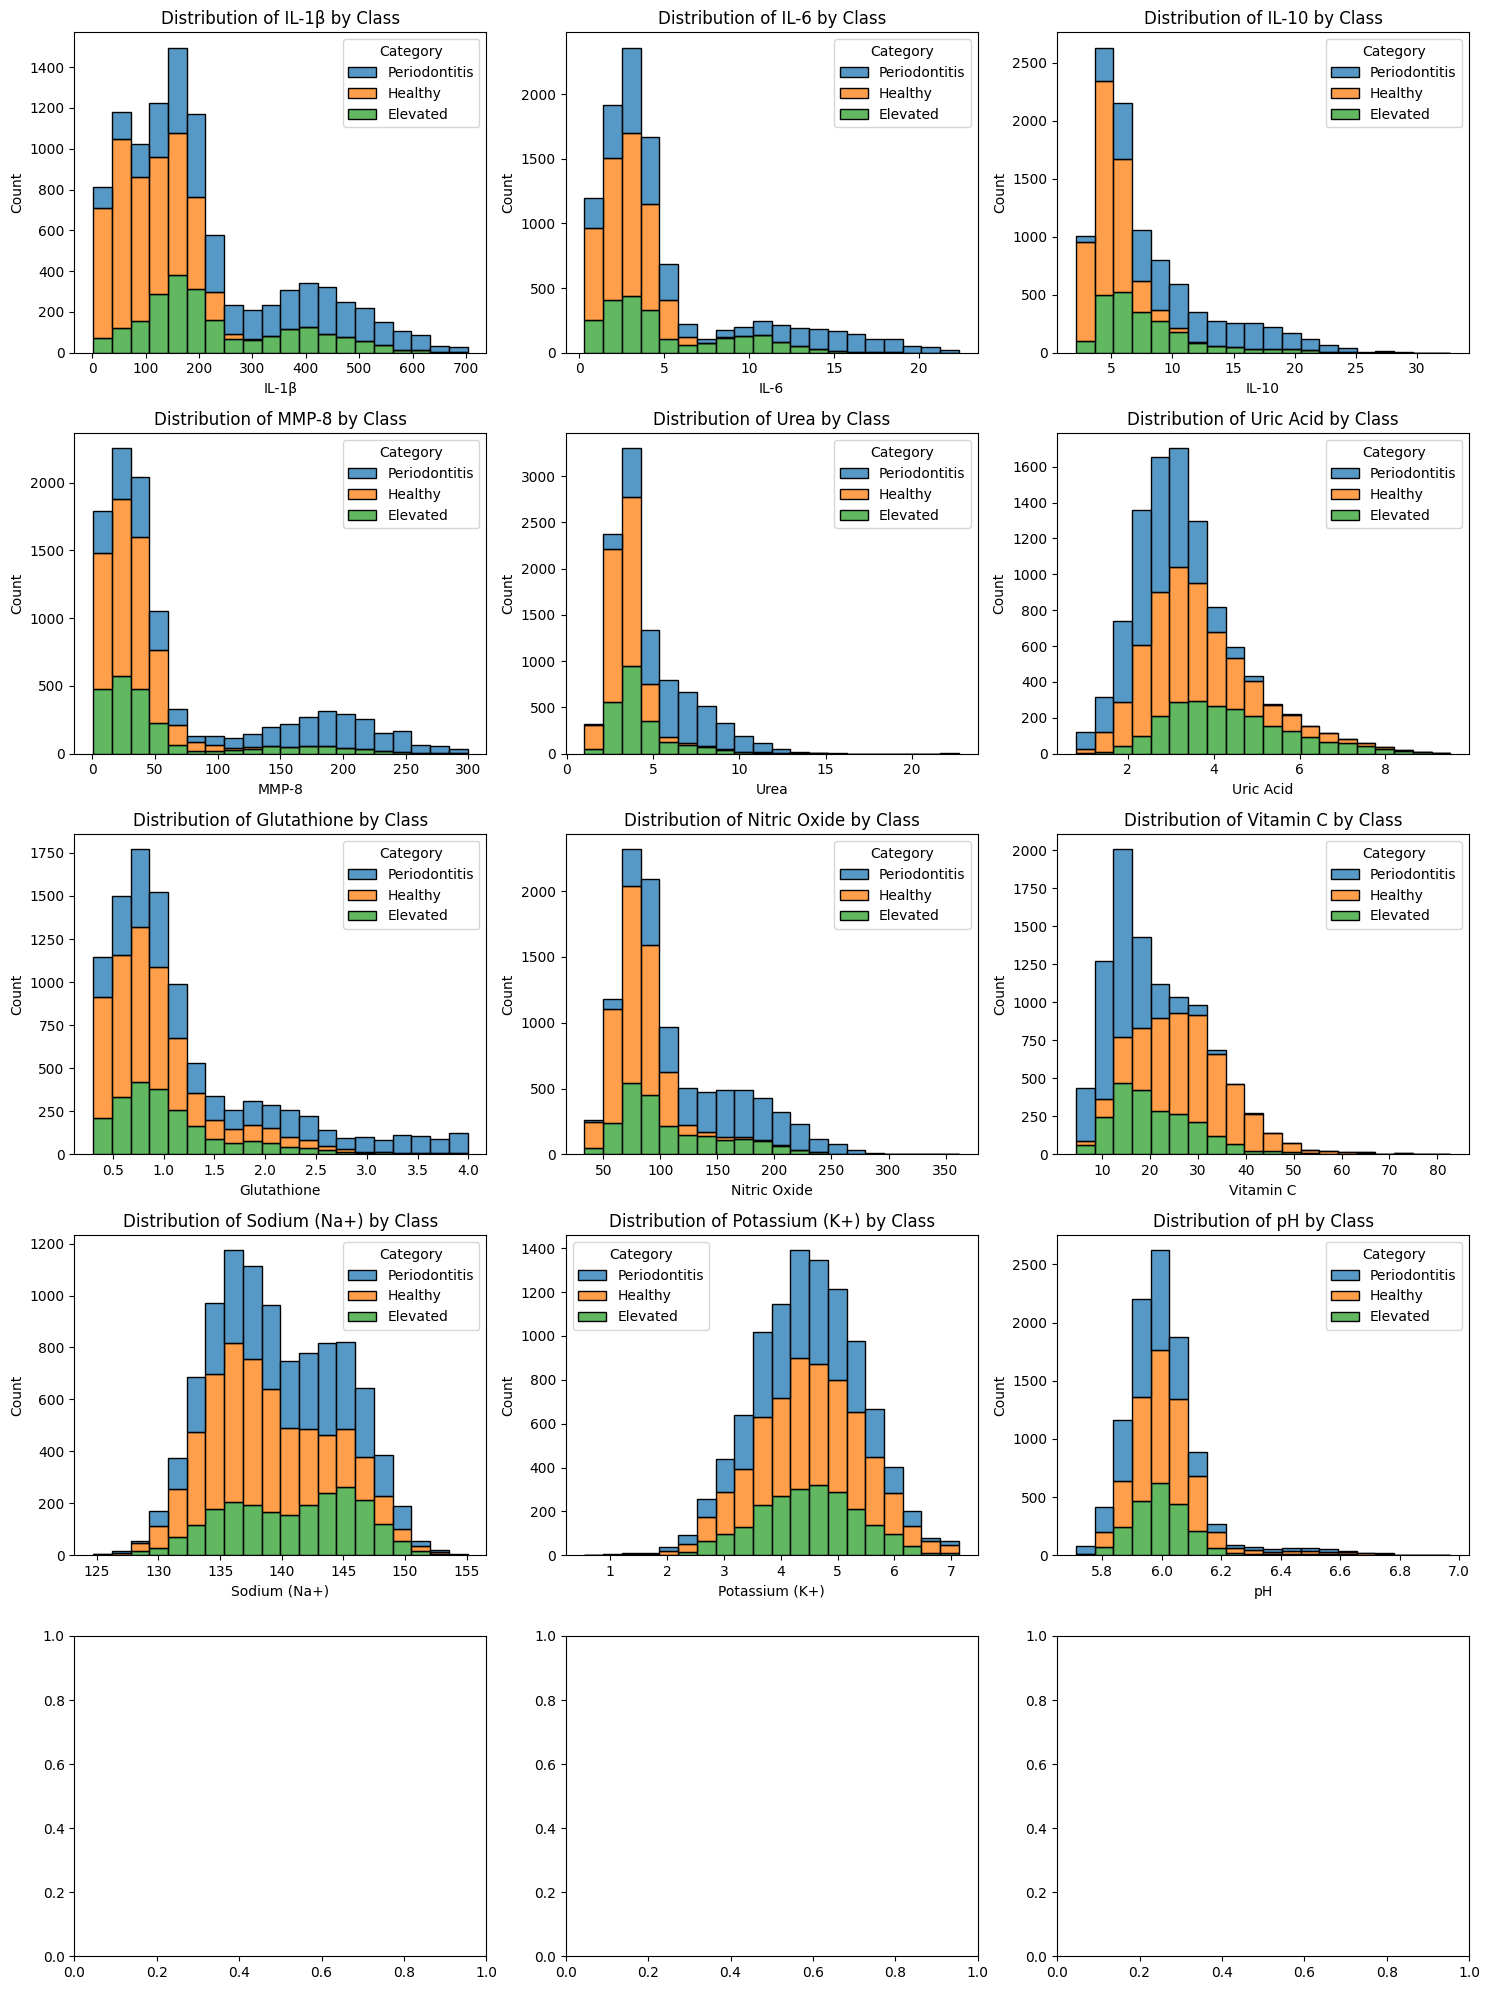

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/final_new_dataset-elevated.csv')

#Select only numerical features
cols = data.select_dtypes(include=['float64']).columns

#Set up the figure
fig, axes = plt.subplots(nrows=len(cols)//3+1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

#Loop through each feature and plot
for i, col in enumerate(cols):
    sns.histplot(data, x=col, hue='Category', multiple="stack", bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Class")

plt.tight_layout()
plt.show()